In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.insert(0, module_path)
from pathlib import Path

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
from spectroscopy.utils import load_training_data, plot_residuals, get_wavelength_columns, parse_trm_files

In [4]:
from spectroscopy.model import load_model, get_features

In [5]:
df_trms = parse_trm_files()
# fill negative values of trms
# wavelength_columns = get_wavelength_columns(df_trms)
# df_trms[df_trms[wavelength_columns] < 0][wavelength_columns] = 0
num = df_trms._get_numeric_data()

num[num < 0] = 0

In [6]:
num[num < 0]

,862.13,863.88,865.63,867.38,869.13,870.88,872.63,874.38,876.13,877.88,...,1737.13,1738.88,1740.63,1742.38,1744.13,1745.88,1747.63,1749.38,1751.13,1752.88
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
model = load_model(model_dir=Path().cwd().parent/'bin'/'model')

In [8]:
data = load_training_data()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Columns: 520 entries, 862.13 to Moisture
dtypes: float64(512), int64(2), object(6)
memory usage: 857.3+ KB


In [10]:
data.describe()

,862.13,863.88,865.63,867.38,869.13,870.88,872.63,874.38,876.13,877.88,...,1744.13,1745.88,1747.63,1749.38,1751.13,1752.88,integration_time,run_number,Ammonia-N,Moisture
count,2.110000e+02,2.110000e+02,2.110000e+02,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,...,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,1.000000e-03,1.000000e-03,1.000000e-03,9.611196,37.413955,31.652350,58.921526,61.199009,60.735365,58.776284,...,54.420682,54.511725,54.582204,54.660256,54.753227,54.871417,40.023697,1.838863,0.358578,22.045877
std,4.347122e-19,4.347122e-19,4.347122e-19,19.972674,84.758850,64.556519,11.253090,11.461708,11.422105,11.250918,...,10.984430,10.992286,11.004698,11.011815,11.015893,11.013377,2.907201,0.835297,0.300587,14.646718
min,1.000000e-03,1.000000e-03,1.000000e-03,0.000000,0.000000,0.000000,15.144000,15.920000,15.825000,15.246000,...,15.925000,15.931000,15.938000,15.998000,16.056000,16.092000,35.000000,1.000000,0.070000,8.960000
25%,1.000000e-03,1.000000e-03,1.000000e-03,0.000000,0.000000,0.000000,54.789500,57.187500,56.490000,54.046000,...,49.683500,49.788000,49.855000,49.943500,50.056500,50.211500,40.000000,1.000000,0.200000,11.800000
50%,1.000000e-03,1.000000e-03,1.000000e-03,0.000000,0.000000,0.000000,60.219000,62.969000,62.520000,60.332000,...,55.150000,55.322000,55.418000,55.379000,55.414000,55.548000,40.000000,2.000000,0.320000,19.200000
75%,1.000000e-03,1.000000e-03,1.000000e-03,12.440000,37.168000,40.036000,66.472500,68.667000,68.174000,66.446000,...,61.753500,61.865000,61.942000,61.998500,62.032000,62.144500,40.000000,3.000000,0.440000,25.250000
max,1.000000e-03,1.000000e-03,1.000000e-03,101.090000,464.490000,369.440000,76.971000,78.993000,78.589000,76.930000,...,73.608000,73.651000,73.713000,73.801000,73.876000,73.900000,45.000000,3.000000,2.240000,82.100000


In [11]:
data['sample_name'].value_counts()

hampton west 2     10
hampton east 2     10
south 17            6
south 9             6
south 15            6
south 2             6
south 1             6
hampton west        6
south 16            6
south 6             4
hampton east 1      4
north 5             4
north 4             4
north 7             4
north 1             4
north 17            4
south 13            4
north 10            4
north 8             4
north 9             4
north 6             4
north 12            4
west 12             4
south 4             4
south 18            4
south 10            4
north 16            4
south 12            4
south 5             4
hampton west 1      4
south 3             4
north 3             4
north 2             4
north 14            4
south 11            4
south 7             4
south 14            4
west 14             4
north 18            4
south 8             4
north 11            4
dows dry            3
north 13            3
iowa falls          3
hampton east        3
hampton co

In [12]:
data['process_method'].fillna('none', inplace=True)
data['process_method'] = data['process_method'].astype(str)
# df = df[df['process_method'].isin(['ground','wet'])]
data = pd.concat([data, pd.get_dummies(data['process_method'])], axis=1)


In [13]:
feature_columns = get_features(data)
X, y = data[feature_columns], data['Ammonia-N']

In [14]:
feature_columns

['862.13',
 '863.88',
 '865.63',
 '867.38',
 '869.13',
 '870.88',
 '872.63',
 '874.38',
 '876.13',
 '877.88',
 '879.63',
 '881.38',
 '883.13',
 '884.88',
 '886.63',
 '888.38',
 '890.13',
 '891.88',
 '893.63',
 '895.38',
 '897.13',
 '898.88',
 '900.63',
 '902.38',
 '904.13',
 '905.88',
 '907.63',
 '909.38',
 '911.13',
 '912.88',
 '914.63',
 '916.38',
 '918.13',
 '919.88',
 '921.63',
 '923.38',
 '925.13',
 '926.88',
 '928.63',
 '930.38',
 '932.13',
 '933.88',
 '935.63',
 '937.38',
 '939.13',
 '940.88',
 '942.63',
 '944.38',
 '946.13',
 '947.88',
 '949.63',
 '951.38',
 '953.13',
 '954.88',
 '956.63',
 '958.38',
 '960.13',
 '961.88',
 '963.63',
 '965.38',
 '967.13',
 '968.88',
 '970.63',
 '972.38',
 '974.13',
 '975.88',
 '977.63',
 '979.38',
 '981.13',
 '982.88',
 '984.63',
 '986.38',
 '988.13',
 '989.88',
 '991.63',
 '993.38',
 '995.13',
 '996.88',
 '998.63',
 '1000.38',
 '1002.13',
 '1003.88',
 '1005.63',
 '1007.38',
 '1009.13',
 '1010.88',
 '1012.63',
 '1014.38',
 '1016.13',
 '1017.88',

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

<AxesSubplot:>

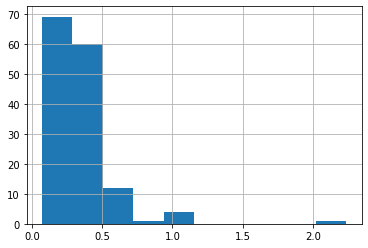

In [16]:
y_train.hist()

<AxesSubplot:>

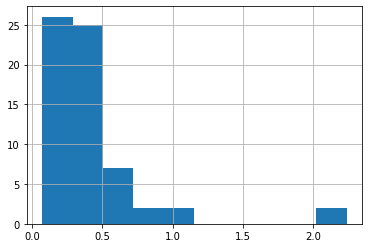

In [17]:
y_test.hist()

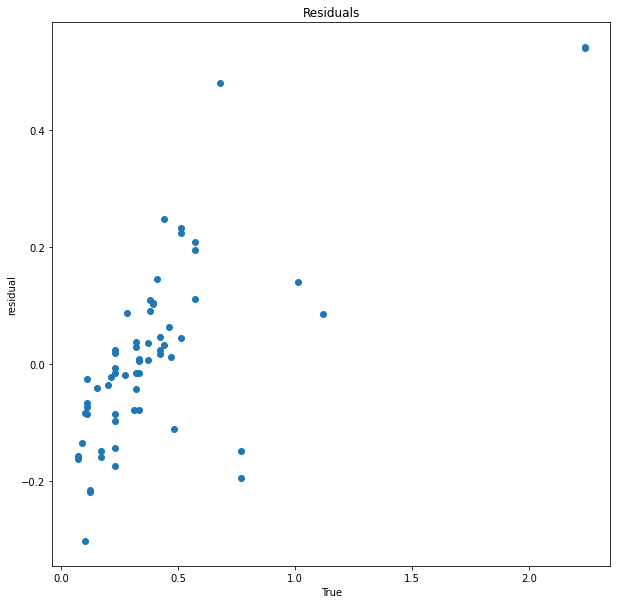

In [18]:
plot_residuals(y_test, model.predict(X_test))

In [19]:
len(X), len(X_test), len(X_train)

(211, 64, 147)

In [20]:
assert (X_test.index == y_test.index).all()

# view highest error samples

In [21]:
def rank_error(model, X, y_true, original_data, n_instances=None, include_wavelengths=False):
    y_pred = model.predict(X)
    # calculate error metrics
    residuals = y_true - y_pred
    abs_residuals = np.abs(residuals)
    # get indices of highest error
    abs_res_indices = np.argsort(abs_residuals)[::-1]
    if n_instances is not None:
        abs_res_indices = abs_res_indices[:n_instances]
    # pull training samples with highest error
    X_ranked = X.iloc[abs_res_indices]
    # pull original data corresponding to those training samples
    high_error_data = data.loc[X_ranked.index].copy()
    if not include_wavelengths:
        wavelength_columns = get_wavelength_columns(high_error_data)
        high_error_data.drop(wavelength_columns, inplace=True, axis=1)
    high_error_data['predicted_Ammonia-N'] = y_pred[abs_res_indices]
    high_error_data['absolute_residual'] = abs_residuals.iloc[abs_res_indices]
    high_error_data['residual'] = residuals.iloc[abs_res_indices]
    return high_error_data

In [22]:
data_ranked = rank_error(model, X_test, y_test, data, include_wavelengths=True)

In [23]:
data_ranked

,862.13,863.88,865.63,867.38,869.13,870.88,872.63,874.38,876.13,877.88,...,process_method,Ammonia-N,filename_lr,Moisture,ground,moist,none,predicted_Ammonia-N,absolute_residual,residual
83,0.001,0.001,0.001,12.5010,37.312,23.418,35.543,36.812,36.376,34.847,...,moist,2.24,Lab Report - Hampton Coulter - 6-15-20.csv,75.1,0,1,0,1.6985,0.5415,0.5415
69,0.001,0.001,0.001,6.6416,31.067,38.889,35.573,36.845,36.378,34.870,...,moist,2.24,Lab Report - Hampton Coulter - 6-15-20.csv,75.1,0,1,0,1.6999,0.5401,0.5401
20,0.001,0.001,0.001,17.0070,64.807,65.696,72.154,74.040,73.590,72.025,...,ground,0.68,Lab Report - West 12 - 7-6-20.csv,10.4,1,0,0,0.2008,0.4792,0.4792
35,0.001,0.001,0.001,12.2020,27.341,14.433,51.372,53.758,53.086,50.720,...,none,0.10,Lab Report - North 8 - 7-9-20.csv,15.4,0,0,1,0.4024,0.3024,-0.3024
117,0.001,0.001,0.001,0.0000,0.000,0.000,72.754,75.010,74.716,73.233,...,none,0.44,Lab Report - North 17 - 7-9-20.csv,17.2,0,0,1,0.1919,0.2481,0.2481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0.001,0.001,0.001,0.0000,0.000,0.000,51.570,54.152,53.558,51.173,...,ground,0.47,Lab Report - South 7 - 7-8-20.csv,38.4,1,0,0,0.4575,0.0125,0.0125
60,0.001,0.001,0.001,0.0000,0.000,23.135,68.044,70.238,69.733,67.426,...,ground,0.33,Lab Report - South 8 - 7-8-20.csv,30.3,1,0,0,0.3209,0.0091,0.0091
131,0.001,0.001,0.001,19.0450,68.314,55.132,53.999,56.201,55.532,53.318,...,none,0.23,Lab Report - South 14 - 7-8-20.csv,23.4,0,0,1,0.2373,0.0073,-0.0073
183,0.001,0.001,0.001,19.5330,72.934,64.715,63.485,65.937,65.446,63.455,...,ground,0.37,Lab Report - Hampton West - 6-15-20.csv,16.1,1,0,0,0.3639,0.0061,0.0061


In [24]:
data_ranked.to_csv('data_ranked_by_residuals.csv')